In [1]:
import matplotlib.pyplot as plt # For ploting
import numpy as np # To work with numerical data efficiently

In [2]:
c = 299792458.0 #The Speed of Light in m/s
G = 6.67408e-11 # The Gravitional Constant
M_sun = 1.9884754153381438e+30 # The mass of the sun
f_0 = float(10) # An Initial frequency of 10 Hz
m_1 = 114*M_sun # Mass of Object 1 in the Binary
m_2 = 114*M_sun # Mass of Object 2 in the Binary
omega_0 = 2*np.pi*f_0 # This is the inital angular frequency
M = m_1 + m_2 # Total Mass of the Binarry system
f_LSO = (c**3)/((6**(3/2))*(np.pi)*(G*M)) # The frequency when the two objects merge
omega_LSO = 2*np.pi*f_LSO # The angular frequency when the two objects merge

In [3]:
if M >0:
    v = (m_1*m_2)/(M**2) # Symmetric Mass
    M_chirp = (v**(3/5))*M # Chirp Mass
    if M_chirp >0: # We used if statments to not get the division by zero error
        if omega_0>0:
            t_c = (5/256)*((c/(G*M_chirp))**(5/3))*((1/omega_0)**(8/3))
            print(t_c)

5.722696991380184e-30


In [4]:
t_LSO = (1 - (omega_0/omega_LSO)**(8/3))*t_c #Time at which the two objects merge
print(t_LSO)

4.729663858176696e-30


In [5]:
def omega(t): 
    return omega_0*(1- (t/t_c))**(-3/8) # We defined the angular frequency as a function of t

In [6]:
def phi(t):
    return (-1/32)*((G*M_chirp*omega(t))/c)**(-5/3) # We defined the orbital phase

In [7]:
r = 10**23 # Distancce of Binary from earth in meters

In [8]:
# Now we will define the plus polarization for gravitional waves from a compact binary
def h_plus(i,t):
    return (2*M_chirp/r)*((M_chirp*omega(t))**(2/3))*(1+(np.cos(i)**2))*np.cos(2*phi(t))

In [9]:
# Now we will define the cross polarization for gravitional waves from a compact binary
def h_cross(i,t):
    return (4*M_chirp/r)*((M_chirp*omega(t))**(2/3))*np.cos(i)*np.sin(2*phi(t))

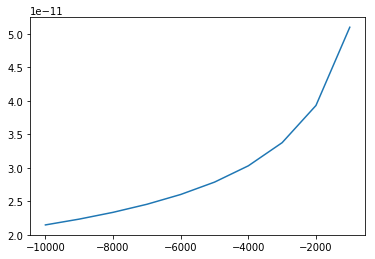

In [10]:
t = np.arange(-10000, t_LSO, 1000)
# Compose plot for the angular frequency with respect to time
plt.figure(1)
plt.plot(t, omega(t))

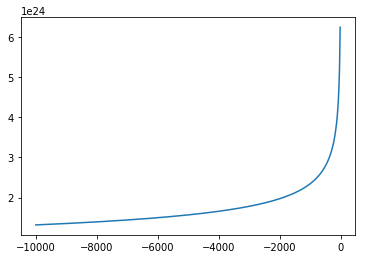

In [12]:
t = np.arange(-10000, t_LSO, 20)
i = 45
# Compose plot for the plus polarization
plt.figure(1)
plt.plot(t, h_plus(i,t))

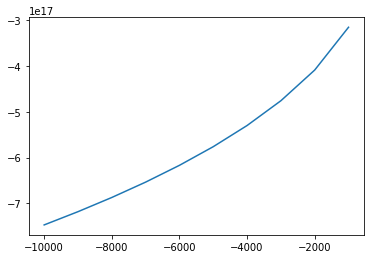

In [13]:
t = np.arange(-10000, t_LSO, 1000)
i = 45
# Compose plot for the cross polarization
plt.figure(1)
plt.plot(t, h_cross(i,t))

In [14]:
# Example I came up with as a test
# Above plots seem to be plotting omega(t) or something simlar to that and not h_plus/h_cross
def f(t):
    return omega(t)*np.cos(t)

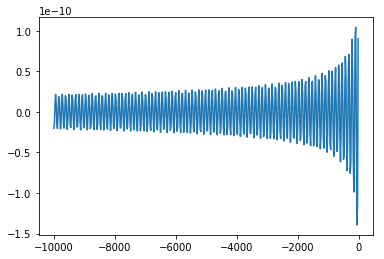

In [15]:
t = np.arange(-10000, t_LSO, 20)
# Compose plot for the cross polarization
plt.figure(1)
plt.plot(t, f(t)) # This worked perfectly
#This is how the other graphs should look more or less 
#This helped me figure out that what is wrong with the way I defined 
# h_plus and h_cross is that I put a function phi(t) inside both cosine and sine
# I am not sure how to fix this problem though
# The solution must be that I must find out how to define a function inside cosine and sine